In [1]:
from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [2]:
# Task 1: Exploratory Data Analysis

In [3]:
# Reading the metadata and data files
metadata = pd.read_csv("dengue_metadata.csv")
data = pd.read_csv("dengue_data.csv")

# Transpose the gene expression data
transposed_data = data.set_index('Unnamed: 0').T

# Renaming the index to match the metadata for merging
transposed_data.index.name = 'sample'
transposed_data.reset_index(inplace=True)

# Merging the gene expression data with the metadata
merged_data = pd.merge(transposed_data, metadata, on='sample')

# Filtering out non-gene expression data from the merged dataset for PCA
gene_expression = merged_data.drop(metadata.columns.to_list(), axis=1)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_expression)

# Performing PCA for the first ten principal components
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Extracting the explained variance ratios for the first ten principal components
explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_ratios

array([0.16861576, 0.08293707, 0.06446878, 0.04503035, 0.0345267 ,
       0.03198177, 0.02453489, 0.02045592, 0.01961043, 0.01880357])

In [4]:
#Task 1: Principal Component Analysis (PCA) Plot

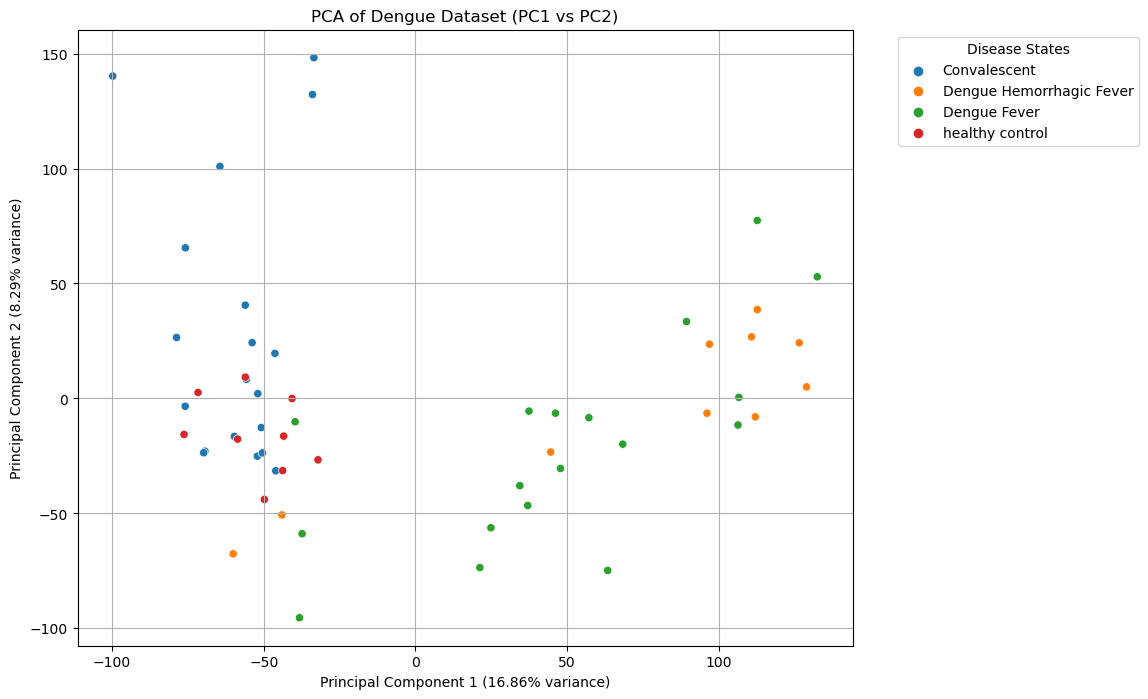

In [5]:
# PCA is implemented
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
merged_data['PCA1'] = pca_result[:, 0]
merged_data['PCA2'] = pca_result[:, 1]

# Explained variance for each Principal Component
explained_variance = pca.explained_variance_ratio_

# Plots the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='disease.state', data=merged_data, palette='tab10')

# Details of the plot
plt.title('PCA of Dengue Dataset (PC1 vs PC2)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.legend(title='Disease States', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)

# Outputs the PCA plot
plt.show()

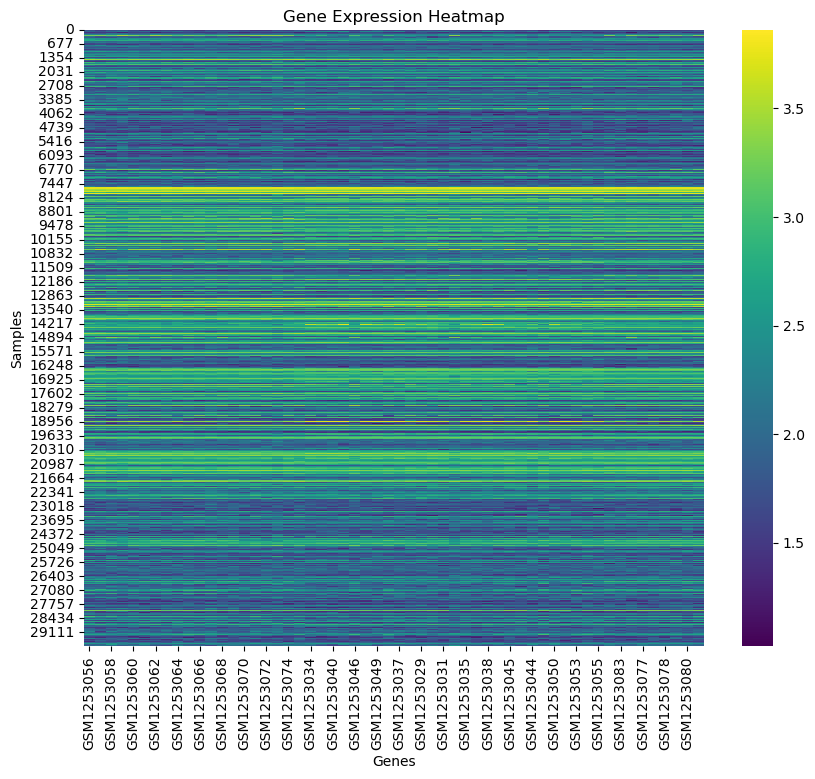

In [7]:
# Reading the data file
data = pd.read_csv("dengue_data.csv")

# Assuming the first column of 'data' contains non-numeric data (e.g., gene names)
# We need to exclude this column when creating the heatmap
heatmap_data = data.drop(data.columns[0], axis=1)

# Generates a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')  # Change the colormap as desired

# Plot components
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.title('Gene Expression Heatmap')
plt.show()

In [8]:
# Task 1: Hierarchical Cluster Analysis (HCA) map

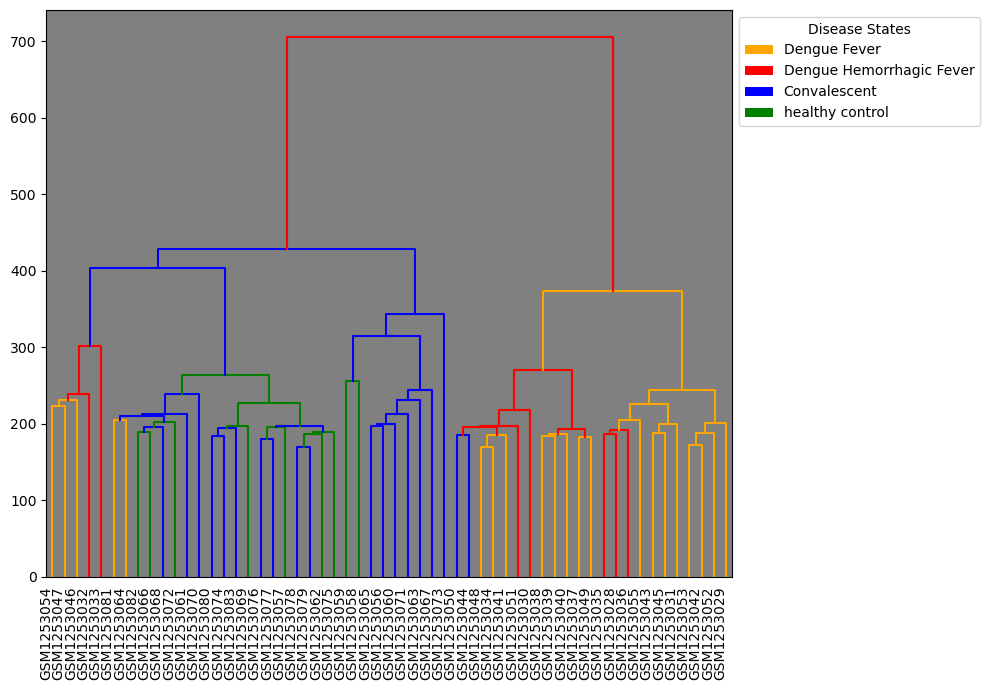

In [9]:
# Gene expression data and metadata loaded
data_frame_ = pd.read_csv("dengue_data.csv", index_col=0)
metadata_frame_ = pd.read_csv("dengue_metadata.csv")

# Gene expression transposed
transposed_data_ = data_frame_.T

# Merge the metadata with the transposed gene expression data on sample 
merged_dataset_ = pd.merge(metadata_frame_, transposed_data_, left_on='sample', right_index=True)

# standardise and prepare  the numeric data 
numeric_dataset_ = merged_dataset_.select_dtypes(include=[np.number])
scaler_ = StandardScaler()
scaled_numeric_data_ = scaler_.fit_transform(numeric_dataset_)

# Perform hierarchical clustering using the Ward method
hierarchical_linkage_ = linkage(scaled_numeric_data_, method='ward')

# Defines a color scheme for four disease states
color_scheme_ = {
    'Dengue Fever': 'orange',
    'Dengue Hemorrhagic Fever': 'red',
    'Convalescent': 'blue',
    'healthy control': 'green'
}

# Create and configure a figure for the dendrogram
fig, ax = plt.subplots(figsize=(10, 7))
plt.gca().set_facecolor('grey')   # Set a colored background for the plot

# Generate and plot the dendrogram
dendrogram_plot_ = dendrogram(hierarchical_linkage_, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Configure the x-axis ticks and labels
ax.set_xticks([10 * i for i in range(len(dendrogram_plot_['leaves']))])
ax.set_xticklabels(merged_dataset_['sample'].iloc[dendrogram_plot_['leaves']], rotation=90, ha='center', fontsize=10)

# Color the branches of the dendrogram based on the disease state of each sample
for x_coords_, y_coords_, idx_ in zip(dendrogram_plot_['icoord'], dendrogram_plot_['dcoord'], dendrogram_plot_['leaves']):
    disease_state_ = merged_dataset_.iloc[idx_]['disease.state']
    plt.plot(x_coords_, y_coords_, color_scheme_[disease_state_])

# Create and add a legend for the different disease states
legend_elements_ = [Patch(facecolor=color, label=state) for state, color in color_scheme_.items()]
plt.legend(handles=legend_elements_, title='Disease States', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

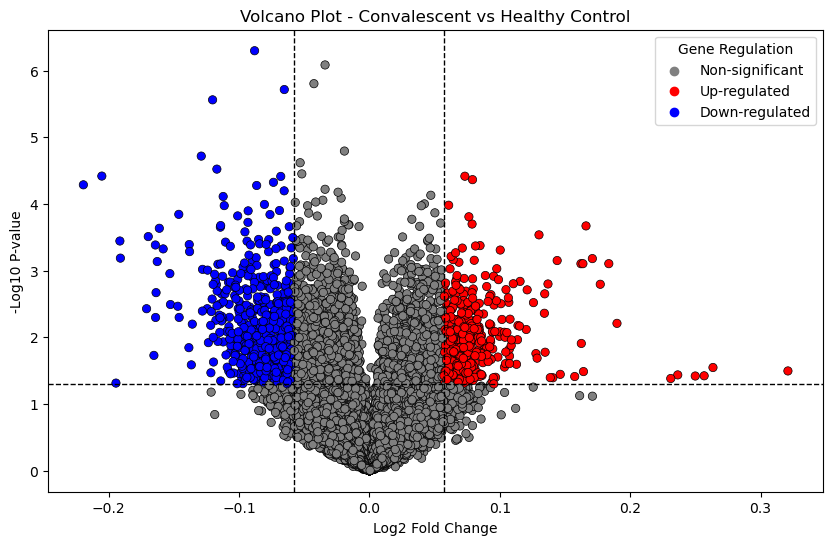

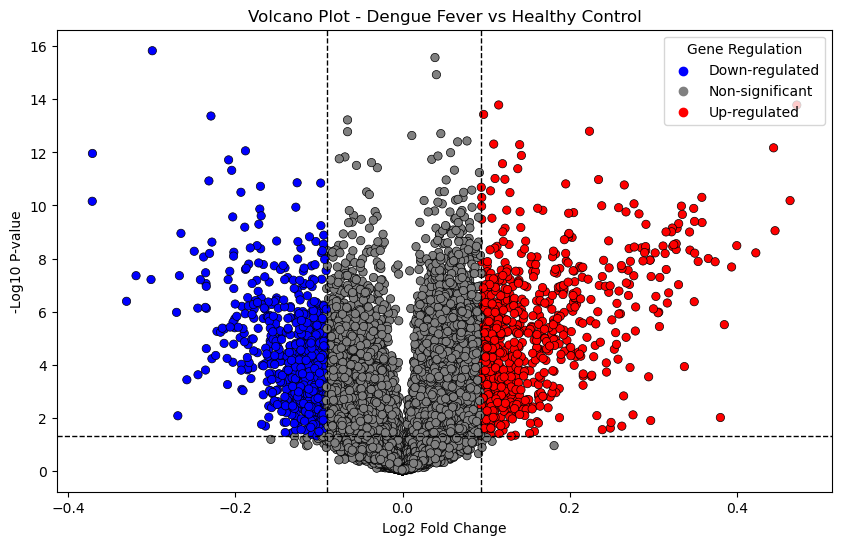

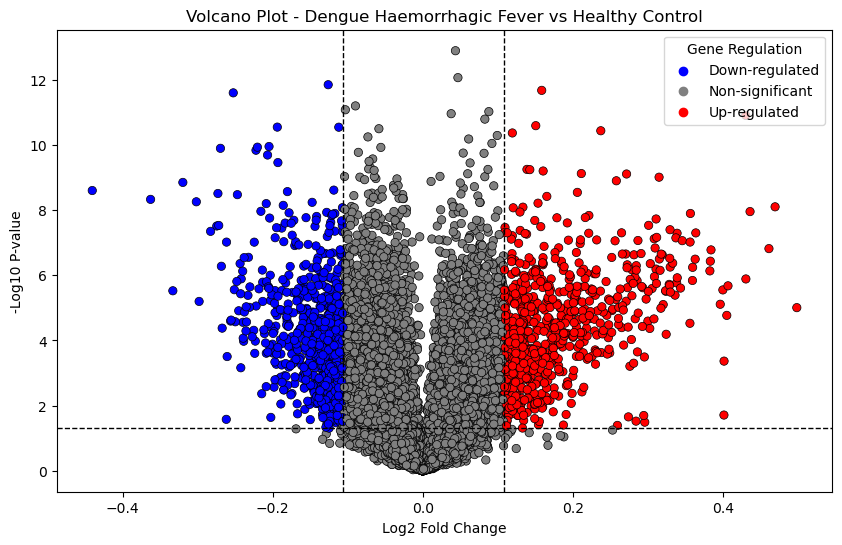

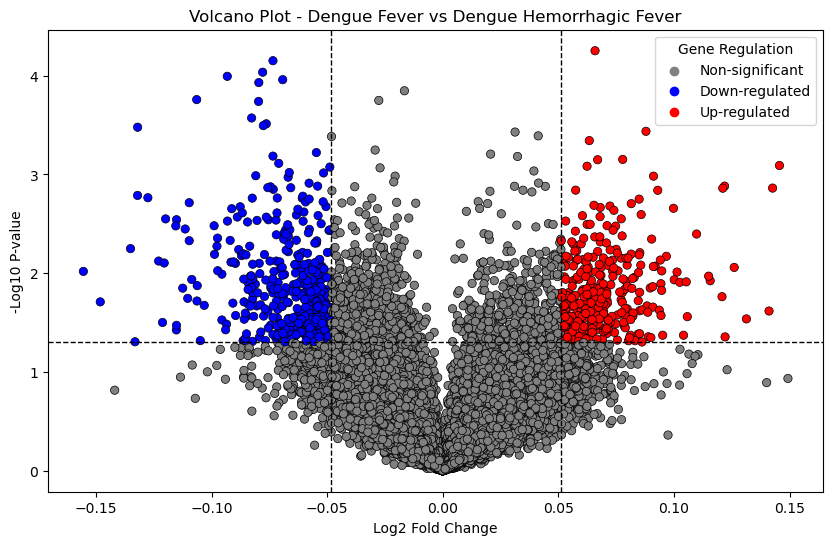

In [10]:
#Loads dengue_data and metadata
dengue_data = pd.read_csv("dengue_data.csv")
dengue_metadata = pd.read_csv("dengue_metadata.csv")

# Aligns dengue_data dataframe with the metadata
dengue_data_transposed = dengue_data.set_index('Unnamed: 0').T
dengue_data_transposed.reset_index(inplace=True)
dengue_data_transposed.rename(columns={'index': 'sample'}, inplace=True)

# Merges the transposed data with the metadata
combined_data = pd.merge(dengue_metadata, dengue_data_transposed, on='sample')

combined_data.head()

# Filters the data based on the disease states and control group
disease_states = ['Convalescent', 'Dengue Fever', 'Dengue Hemorrhagic Fever']
control_group = 'healthy control'

# Filters the dataset for the relevant samples
relevant_samples = combined_data[combined_data['disease.state'].isin(disease_states + [control_group])]

# Split the data into separate dataframes for each disease state and control
convalescent_data = relevant_samples[relevant_samples['disease.state'] == 'Convalescent']
dengue_fever_data = relevant_samples[relevant_samples['disease.state'] == 'Dengue Fever']
dengue_hemorrhagic_fever_data = relevant_samples[relevant_samples['disease.state'] == 'Dengue Hemorrhagic Fever']
control_data = relevant_samples[relevant_samples['disease.state'] == control_group]

# Extract gene expression data for each disease group
convalescent_genes = convalescent_data.iloc[:, 7:]
dengue_fever_genes = dengue_fever_data.iloc[:, 7:]
dengue_hemorrhagic_fever_genes = dengue_hemorrhagic_fever_data.iloc[:, 7:]
control_genes = control_data.iloc[:, 7:]

# To ensure consistency, the shape of the dataframe is checked
(convalescent_genes.shape, dengue_fever_genes.shape, dengue_hemorrhagic_fever_genes.shape, control_genes.shape)

# Performs differential expression analysis
def differential_expression_analysis(disease_genes, control_genes):
    # Calculate the mean expression in the disease and control groups
    disease_mean = disease_genes.mean()
    control_mean = control_genes.mean()

    # log fold change
    log_fold_change = np.log2(disease_mean + 1) - np.log2(control_mean + 1)

    # T-test
    p_values = ttest_ind(disease_genes, control_genes, axis=0, nan_policy='omit').pvalue

    # Combine results from log fold and t-test into a dataframe
    results = pd.DataFrame({
        'log_fold_change': log_fold_change,
        'p_value': p_values
    })

    return results

# Differential expression analysis for each disease state
convalescent_results = differential_expression_analysis(convalescent_genes, control_genes)
dengue_fever_results = differential_expression_analysis(dengue_fever_genes, control_genes)
dengue_hemorrhagic_fever_results = differential_expression_analysis(dengue_hemorrhagic_fever_genes, control_genes)
dengue_fever_vs_hemorrhagic_results = differential_expression_analysis(dengue_fever_genes, dengue_hemorrhagic_fever_genes)

convalescent_results.head()


def create_highlighted_volcano_plot(results, title):
    # Define thresholds for significance based on data distribution
    p_value_threshold = 0.05  # P-value threshold for significance
    log2fc_threshold_lower = np.percentile(results['log_fold_change'], 2.5)  # Lower 2.5 percentile
    log2fc_threshold_upper = np.percentile(results['log_fold_change'], 97.5)  # Upper 2.5 percentile
    
    # Classify genes based on thresholds
    results['significance'] = 'Non-significant'
    results.loc[(results['p_value'] < p_value_threshold) & 
                (results['log_fold_change'] >= log2fc_threshold_upper), 'significance'] = 'Up-regulated'
    results.loc[(results['p_value'] < p_value_threshold) & 
                (results['log_fold_change'] <= log2fc_threshold_lower), 'significance'] = 'Down-regulated'
    
    # Create a color palette for the plot
    palette = {'Non-significant': 'gray', 'Up-regulated': 'red', 'Down-regulated': 'blue'}
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    ax = sns.scatterplot(data=results, x='log_fold_change', y=-np.log10(results['p_value']), hue='significance', 
                         palette=palette, edgecolor='black', linewidth=0.5)
    
    # Display p-value threshold (x-axis)
    plt.axhline(-np.log10(p_value_threshold), color='black', linestyle='--', lw=1)
    
    # Display log fold change thresholds (y-axis)
    plt.axvline(log2fc_threshold_upper, color='black', linestyle='--', lw=1)
    plt.axvline(log2fc_threshold_lower, color='black', linestyle='--', lw=1)
    
    # Inputs title and axis labels
    plt.title(title)
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 P-value')
    
    # Adjust legend position and title
    handles, labels = plt.gca().get_legend_handles_labels()
    if labels:
        plt.legend(title='Gene Regulation', loc='upper right')
    
    # Produces Volcano plot
    plt.show()

# Create the volcano plots with highlighted edges on the dot to make it clearer to view
create_highlighted_volcano_plot(convalescent_results, 'Volcano Plot - Convalescent vs Healthy Control')
create_highlighted_volcano_plot(dengue_fever_results, 'Volcano Plot - Dengue Fever vs Healthy Control')
create_highlighted_volcano_plot(dengue_hemorrhagic_fever_results, 'Volcano Plot - Dengue Haemorrhagic Fever vs Healthy Control')
create_highlighted_volcano_plot(dengue_fever_vs_hemorrhagic_results, 'Volcano Plot - Dengue Fever vs Dengue Hemorrhagic Fever')

In [11]:
# Installs bootstrapped package
!pip install bootstrapped

Bootstrap Mean Accuracy: 0.6316666666666666
Bootstrap 95% Confidence Interval: (0.6133333333333332, 0.6516666666666666)
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



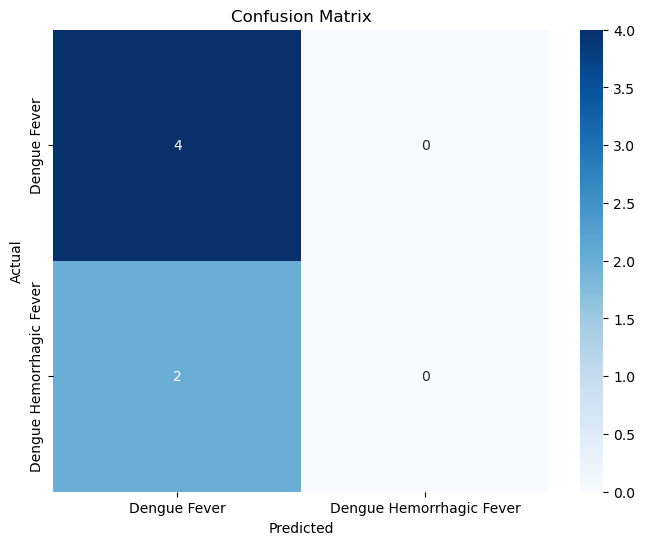

In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bootstrapped import bootstrap as bs
from bootstrapped import stats_functions as bs_stats

# Loaded gene expression data and metadata
data = pd.read_csv("dengue_data.csv", index_col=0)
meta = pd.read_csv("dengue_metadata.csv")

# Merge the metadata with the transposed gene expression data
merged_data = pd.merge(meta, data.T, left_on='sample', right_index=True)

# Encode the 'disease.state' column to numerical values
label_encoder = LabelEncoder()
merged_data['disease.state'] = label_encoder.fit_transform(merged_data['disease.state'])

# Data was filtered to include only Dengue Hemorrhagic Fever and Dengue Fever only
selected_classes = [label_encoder.transform(['Dengue Hemorrhagic Fever'])[0], label_encoder.transform(['Dengue Fever'])[0]]
filtered_data = merged_data[merged_data['disease.state'].isin(selected_classes)]

# Extract features (gene expression data) and the target variable (disease state)
X = filtered_data.drop(['sample', 'disease.state'], axis=1).select_dtypes(include='number')
y = filtered_data['disease.state'].map(lambda x: 1 if x == label_encoder.transform(['Dengue Hemorrhagic Fever'])[0] else 0)

# Data was split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# SVM classifier is initialised and trained
clf = SVC()
clf.fit(X_train, y_train)

# Set the number of bootstrap iterations (100 runs were chosen for performance)
num_iterations = 100
bootstrap_accuracy_scores = []

# Performs bootstrapping to estimate model accuracy
for _ in range(num_iterations):
    bootstrap_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]

    # Trained the model on the bootstrap sample
    clf_bootstrap = SVC()
    clf_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred_bootstrap = clf_bootstrap.predict(X_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    bootstrap_accuracy_scores.append(accuracy_bootstrap)

# The mean accuracy and 95% confidence interval from bootstrap samples are calculated
bootstrap_stats = bs.bootstrap(np.array(bootstrap_accuracy_scores), stat_func=bs_stats.mean, alpha=0.05)
print("Bootstrap Mean Accuracy:", bootstrap_stats.value)
print("Bootstrap 95% Confidence Interval:", (bootstrap_stats.lower_bound, bootstrap_stats.upper_bound))

# Generate and print the classification report with zero_division parameter (set to 0)
class_report = classification_report(y_test, clf.predict(X_test), zero_division=0)
print("Classification Report:\n", class_report)

# Creates a confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create and display a confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Dengue Fever', 'Dengue Hemorrhagic Fever'], yticklabels=['Dengue Fever', 'Dengue Hemorrhagic Fever'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
import random

# Performs 1000 permutations
num_permutations = 1000  

# Utilises list to store accuracy scores from perumted labels
permutation_accuracy_scores = []

#Loop is used ti perform permutations
for _ in range(num_permutations):
    # Copy the training labels and shuffle them
    y_train_permuted = y_train.copy().tolist()
    random.shuffle(y_train_permuted)

    # Train a new model (Support Vector Classifier) on the shuffled labels
    clf_permuted = SVC()
    clf_permuted.fit(X_train, y_train_permuted)

    # Predict on the test set using the model trained with shuffled labels
    y_pred_permuted = clf_permuted.predict(X_test)

    # Calculate and store the accuracy of this permutation
    accuracy_permuted = accuracy_score(y_test, y_pred_permuted)
    permutation_accuracy_scores.append(accuracy_permuted)

# Calculate the mean accuracy across all permutations
permutation_mean_accuracy = np.mean(permutation_accuracy_scores)

# Calculate the observed accuracy of the original model
observed_accuracy = accuracy_score(y_test, clf.predict(X_test))

# Calculates the p-value
p_value = (np.sum(np.array(permutation_accuracy_scores) >= observed_accuracy) + 1) / (num_permutations + 1)

#Output results
print("Observed Accuracy:", observed_accuracy)
print("Permutation Mean Accuracy:", permutation_mean_accuracy)
print("P-Value:", p_value)

# Significance level
alpha = 0.05  

# Checks observed accuracy for statistical significant
if p_value < alpha:
    print("Observed accuracy = statistically significant.")
else:
    print("Observed accuracy = Not statistically significant.")


Observed Accuracy: 0.6666666666666666
Permutation Mean Accuracy: 0.6666666666666665
P-Value: 1.0
Observed accuracy = Not statistically significant.


In [14]:
from statsmodels.stats.multitest import multipletests

# Load data
x = pd.read_csv("dengue_data.csv", index_col = 0)
y = pd.read_csv("dengue_metadata.csv")

# Transpose the gene expression data for easier manipulation
x_t = x.T

# Merge the metadata with the expression data to align samples with their disease states
merged_data = x_t.merge(y.set_index('sample'), left_index=True, right_index=True)

# Separate the data into two groups for comparison: Dengue Fever and Healthy Control
dengue_fever_data = merged_data[merged_data['disease.state'] == 'Dengue Fever']
healthy_control_data = merged_data[merged_data['disease.state'] == 'healthy control']

# Perform t-tests for each gene
p_values = []
for gene in x_t.columns:
    t_stat, p_val = ttest_ind(dengue_fever_data[gene], healthy_control_data[gene], nan_policy='omit')
    p_values.append(p_val)

# Adjust p-values for multiple testing using Benjamini-Hochberg FDR correction
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Create a DataFrame for the results
gene_significance = pd.DataFrame({
    'Gene': x_t.columns,
    'P-Value': p_values,
    'Adjusted P-Value': adjusted_p_values
})

# Display the top significant genes (by adjusted p-value)
top_significant_genes = gene_significance.sort_values(by='Adjusted P-Value').head(10)
top_significant_genes


,Gene,P-Value,Adjusted P-Value
13193,PSMA6,2.654478e-16,3.952120e-12
17601,GRAMD1C,1.467777e-16,3.952120e-12
9347,PSMA4,1.174742e-15,1.166009e-11
10532,VRK2,1.628420e-14,9.742794e-11
17772,KCTD14,1.635960e-14,9.742794e-11
20835,TOMM40L,3.700422e-14,1.806820e-10
1491,CASS4,4.247486e-14,1.806820e-10
18078,BANP,5.963128e-14,2.219551e-10
19264,AGAP7P,1.654532e-13,4.926701e-10
20755,FAM72A,1.592182e-13,4.926701e-10


In [15]:
# Re-import the necessary libraries and load the metadata
import pandas as pd

# Define the path to the metadata file
metadata_path = 'dengue_metadata.csv'

# Load the metadata
metadata = pd.read_csv(metadata_path)

# Count the number of samples for each class in the 'disease.state' column
class_counts = metadata['disease.state'].value_counts()

# Display the counts for each class
class_counts

disease.state
Convalescent                19
Dengue Fever                18
Dengue Hemorrhagic Fever    10
healthy control              9
Name: count, dtype: int64